In [12]:
import numpy as np
from tqdm import tqdm
import os
import re
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from scipy.optimize import curve_fit
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})
from FVSimulation_phase_density.Finite_volume_method_1D import *

In [13]:
chippath = '../DataKian/Al_LT165chip7/'
filename = 'KID3_79dBm__TmK120_avgpulse_ampphase.csv'
length = 310

lambdanm = 402
KID402 = KID_data(chippath,lambdanm,filename,length)

lambdanm = 673
KID673 = KID_data(chippath,lambdanm,filename,length)

lambdanm = 986
KID986 = KID_data(chippath,lambdanm,filename,length)

lambdanm = 1545
KID1545 = KID_data(chippath,lambdanm,filename,length)

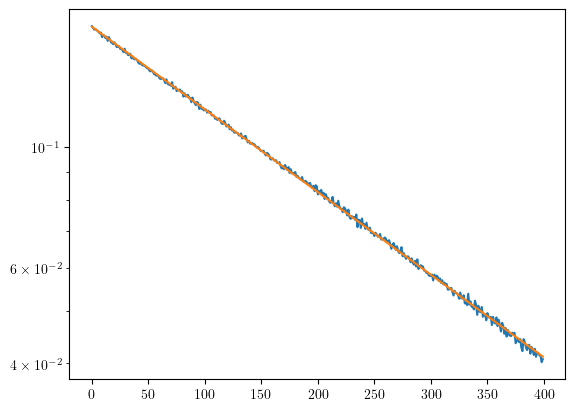

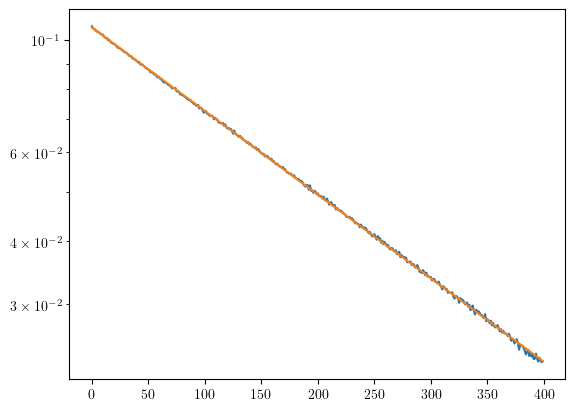

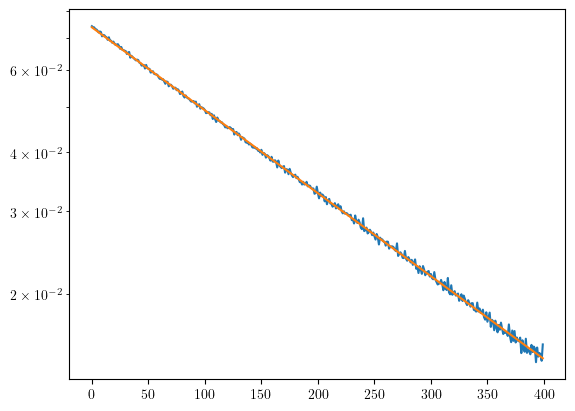

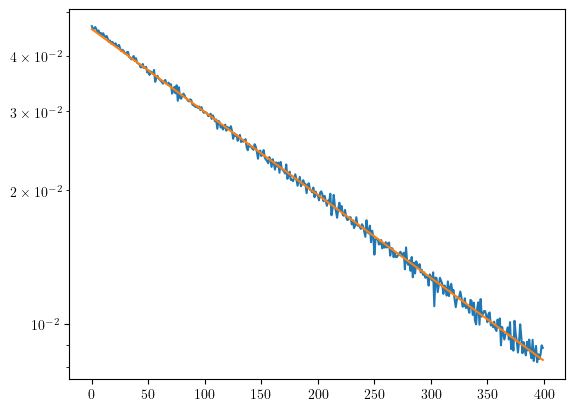

In [14]:
KID402.fit_tail(start=600,end=1000)
KID673.fit_tail(start=600,end=1000)
KID986.fit_tail(start=600,end=1000)
KID1545.fit_tail(start=600,end=1000)

In [15]:
print(KID402.tauqpstar,KID402.tauqpstarstd)
print(KID673.tauqpstar,KID673.tauqpstarstd)
print(KID986.tauqpstar,KID986.tauqpstarstd)
print(KID1545.tauqpstar,KID1545.tauqpstarstd)
print(KID402.L)
print(KID673.L)
print(KID986.L)
print(KID1545.L)

L=KID402.L

KIDdict = {
    402 : KID402,
    673 : KID673,
    986 : KID986,
    1545 : KID1545
}

285.4667024227842 0.3589216004310245
262.12688800788453 0.1857628613057076
246.1472466955042 0.3569114297063301
233.6642956205865 0.6183323484739537
0.0035030355257299746
0.0038149462941395045
0.004062608919761948
0.004279643996718072


In [16]:
offset = 3
simtime = 500
indmin = 500 + offset
indmax = 500 + simtime-1 + offset

def func_to_parallelize(t,D,K,KID):
     SIM = KID_sim(KID,D,K,0.5,1/4,start_offset=offset,simtime_approx=simtime)
     return np.interp(t,SIM.t_axis,SIM.timeseriestheta)
     

def fitfunc(t,D,K):
     datalist = Parallel(n_jobs=4)(delayed(func_to_parallelize)(t,D,K,KIDdict[l]) for l in [402,673,986,1545])
     return np.concatenate(datalist)

In [17]:

fitdatax1545 = KIDdict[1545].t_full[indmin:indmax]-indmin
fitdatay1545 = KIDdict[1545].phase[indmin:indmax]
fitdatax986 = KIDdict[986].t_full[indmin:indmax]-indmin
fitdatay986 = KIDdict[986].phase[indmin:indmax]
fitdatax673 = KIDdict[673].t_full[indmin:indmax]-indmin
fitdatay673 = KIDdict[673].phase[indmin:indmax]
fitdatax402 = KIDdict[402].t_full[indmin:indmax]-indmin
fitdatay402 = KIDdict[402].phase[indmin:indmax]

fitdatax = fitdatax402
fitdatay = np.concatenate([fitdatay402,fitdatay673,fitdatay986,fitdatay1545])

popt, pcov = curve_fit(fitfunc,fitdatax,fitdatay,p0=[10,200],bounds=[0,1000])


100%|██████████| 1000/1000 [00:03<00:00, 254.70it/s]


100%|██████████| 1000/1000 [00:04<00:00, 238.06it/s]


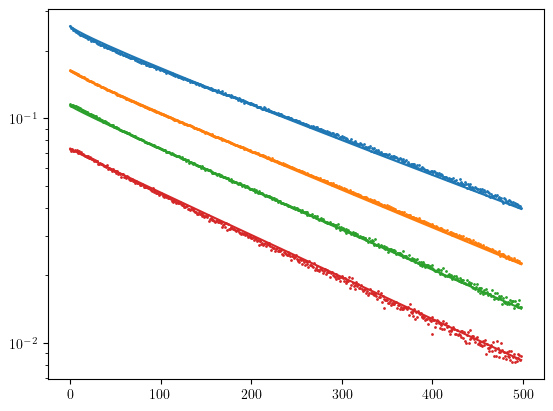

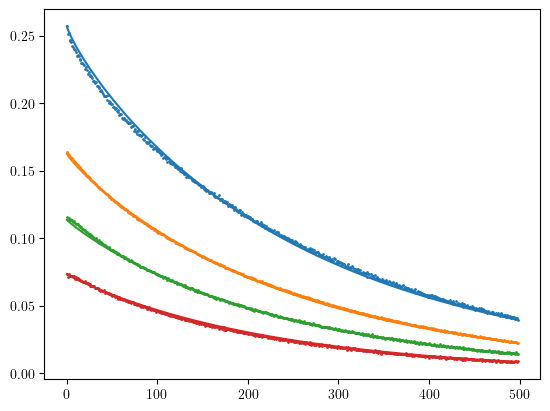

In [18]:
plotdatax = np.array([fitdatax402,fitdatax673,fitdatax986,fitdatax1545])
plotdatay = np.array([fitdatay402,fitdatay673,fitdatay986,fitdatay1545])
fitted = fitfunc(fitdatax402,popt[0],popt[1])
plotfit = np.reshape(fitted,plotdatay.shape)
for x,y,fit in zip(plotdatax,plotdatay,plotfit):
    plt.scatter(x,y,s=1)
    plt.semilogy(x,fit)
plt.show()
for x,y,fit in zip(plotdatax,plotdatay,plotfit):
    plt.scatter(x,y,s=1)
    plt.plot(x,fit)
plt.show()

In [19]:
# Display parameters, standard deviation, and correlation coefficient
parameters = ['D','K']
print("Parameters:")
for i, param in enumerate(popt):
    print(f"{parameters[i]}: {param:.3f}")

print("\nStandard Deviation:")
for i, param in enumerate(np.sqrt(np.diag(pcov))):
    print(f"{parameters[i]}: {param:.3f}")

print("\nCorrelation Coefficients:")
for i in range(len(popt)):
    for j in range(i+1, len(popt)):
        print(f"{parameters[i]} vs {parameters[j]}: {pcov[i,j]/np.prod(np.sqrt(pcov[i,i]*pcov[j,j])):.3f}")

Parameters:
D: 116.773
K: 2.122

Standard Deviation:
D: 807.221
K: 7.266

Correlation Coefficients:
D vs K: 1.000


In [20]:
print(L)

0.0035030355257299746
